<a href="https://colab.research.google.com/github/Beenaa99/Strawberry_Leaf_Disease_Detection/blob/main/Strawberry_Leaf_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Code to rename files under folder - leaf_scorch/healthy leaves

In [12]:
# folder_path = '/content/drive/MyDrive/omdena/Image Collection/Strawberry Leaf - Beenaa/leaf_scorch_fungus'
# files = os.listdir(folder_path)

In [14]:
# files
# files.sort()

# for idx, file_name in enumerate(files, start=1):
#     # Define the new file name
#     new_file_name = f'leaf_scorch{idx}.jpg'

#     # Get full paths
#     old_file_path = os.path.join(folder_path, file_name)
#     new_file_path = os.path.join(folder_path, new_file_name)

#     # Rename the file
#     os.rename(old_file_path, new_file_path)

In [16]:
# folder_path = '/content/drive/MyDrive/omdena/Image Collection/Strawberry Leaf - Beenaa/healthy_leaf'
# files = os.listdir(folder_path)

In [17]:
# files
# files.sort()  # Sort the files to maintain order

# # Rename files sequentially
# for idx, file_name in enumerate(files, start=1):
#     # Define the new file name
#     new_file_name = f'healthy_leaf{idx}.jpg'

#     # Get full paths
#     old_file_path = os.path.join(folder_path, file_name)
#     new_file_path = os.path.join(folder_path, new_file_name)

#     # Rename the file
#     os.rename(old_file_path, new_file_path)

#Initial EDA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of images in each category:
angular_leaf_spots_bacteria: 435 images
healthy_leaf: 1824 images
leaf_scorch_fungus: 1774 images
leaf_spot_fungus: 615 images


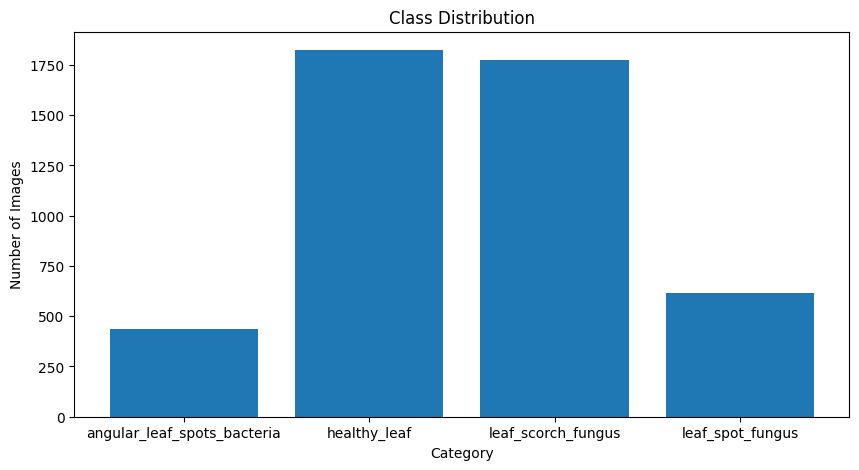

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
drive.mount('/content/drive')

# Path to the main folder containing subfolders
main_folder_path = '/content/drive/MyDrive/omdena/Image Collection/Strawberry Leaf - Beenaa'

# Dictionary to hold file paths
image_paths = {
    'angular_leaf_spots_bacteria': [],
    'healthy_leaf': [],
    'leaf_scorch_fungus': [],
    'leaf_spot_fungus': []
}

# List all files in the subfolders
for category in image_paths.keys():
    folder_path = os.path.join(main_folder_path, category)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            image_paths[category].append(os.path.join(folder_path, file_name))

# Check the number of images in each category
category_counts = {category: len(paths) for category, paths in image_paths.items()}
print("Number of images in each category:")
for category, count in category_counts.items():
    print(f"{category}: {count} images")

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(category_counts.keys(), category_counts.values())
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

In [2]:
import os
all_files = os.listdir(angular_spots_folder)
image_files = [f for f in all_files if f.endswith('.jpg')]
expected_files = {f'angular_leafspot{i}.jpg' for i in range(1, 501)}
actual_files = set(image_files)

# Finding missin filename numbers
missing_files = expected_files - actual_files
print(f'Number of missing images: {len(missing_files)}')
print('Missing images:', sorted(missing_files))


NameError: name 'angular_spots_folder' is not defined

Sample images from angular_leaf_spots_bacteria:


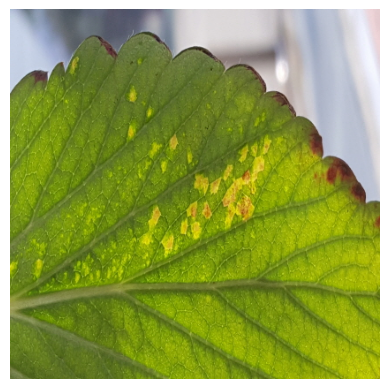

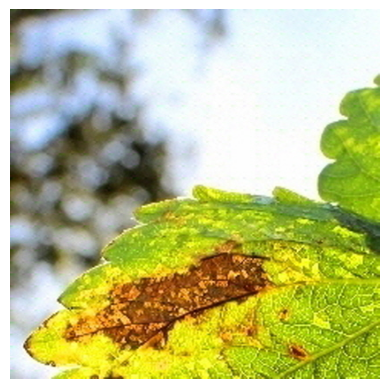

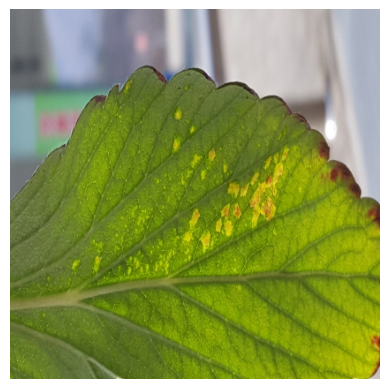

Sample images from healthy_leaf:


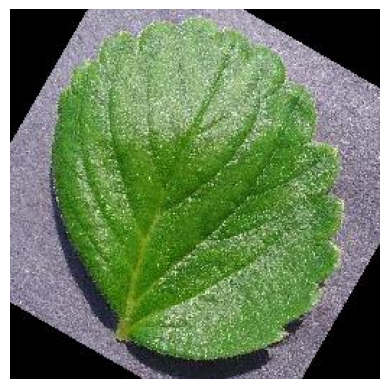

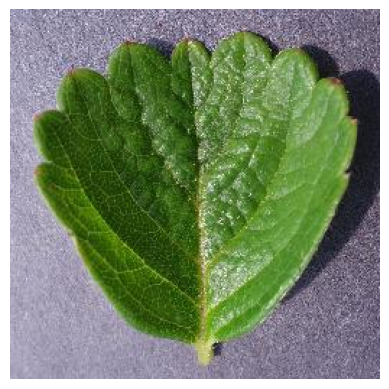

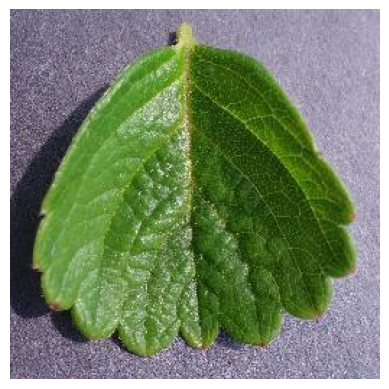

Sample images from leaf_scorch_fungus:


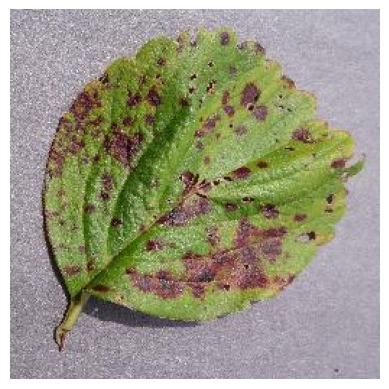

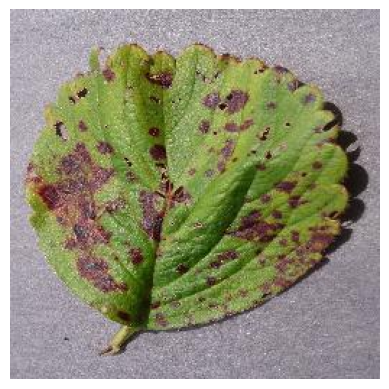

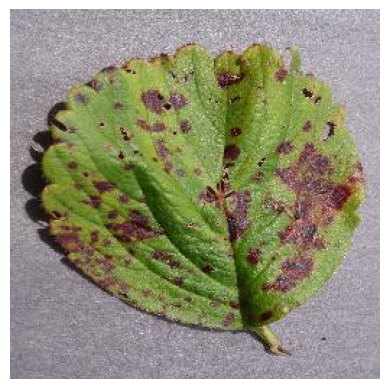

Sample images from leaf_spot_fungus:


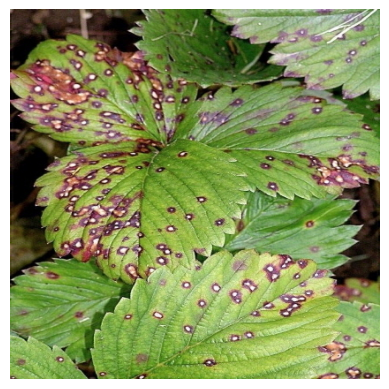

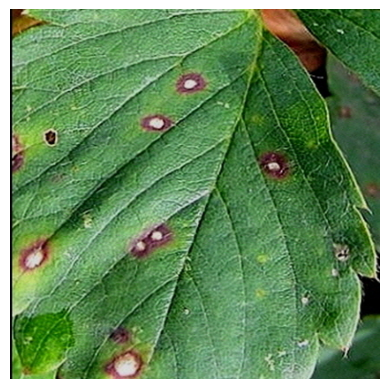

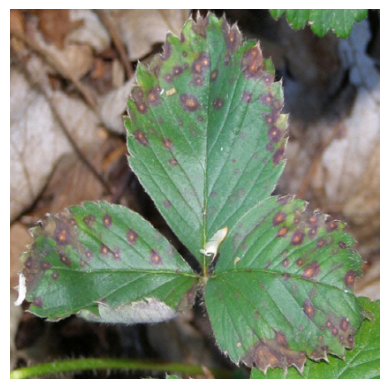

In [3]:
def load_and_display_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

for category, paths in image_paths.items():
    print(f'Sample images from {category}:')
    for i in range(3):
        load_and_display_image(paths[i])


#Sampling data from each category and checking the image sizes

In [4]:
import random

# Set a seed for reproducibility
random.seed(42)

# Number of samples per category
num_samples = 100  # You can adjust this number based on your needs

# Sample images from each category
sampled_image_paths = {
    category: random.sample(paths, min(num_samples, len(paths)))
    for category, paths in image_paths.items()
}

# Display the number of sampled images in each category
for category, paths in sampled_image_paths.items():
    print(f'{category}: {len(paths)} sampled images')


angular_leaf_spots_bacteria: 100 sampled images
healthy_leaf: 100 sampled images
leaf_scorch_fungus: 100 sampled images
leaf_spot_fungus: 100 sampled images


In [7]:
#distribution of image dimensions for sampled images
dimensions = []
labels = []
for category, paths in sampled_image_paths.items():
    for image_file in paths:
        try:
            image = cv2.imread(image_file)
            if image is not None:
                dimensions.append(image.shape[:2])
                labels.append(category)
        except Exception as e:
            print(f"Error loading image {image_file}: {e}")

dimensions_df = pd.DataFrame(dimensions, columns=['Height', 'Width'])
dimensions_df['Category'] = labels

# Display basic statistics of image dimensions
grouped_stats = dimensions_df.groupby('Category').describe()
print(grouped_stats)


                            Height                                          \
                             count   mean  std    min    25%    50%    75%   
Category                                                                     
angular_leaf_spots_bacteria  100.0  419.0  0.0  419.0  419.0  419.0  419.0   
healthy_leaf                 100.0  256.0  0.0  256.0  256.0  256.0  256.0   
leaf_scorch_fungus           100.0  256.0  0.0  256.0  256.0  256.0  256.0   
leaf_spot_fungus             100.0  419.0  0.0  419.0  419.0  419.0  419.0   

                                    Width                                   \
                               max  count   mean  std    min    25%    50%   
Category                                                                     
angular_leaf_spots_bacteria  419.0  100.0  419.0  0.0  419.0  419.0  419.0   
healthy_leaf                 256.0  100.0  256.0  0.0  256.0  256.0  256.0   
leaf_scorch_fungus           256.0  100.0  256.0  0.0  256.0  2

# Resizing and normalizing the images (256x256)

In [8]:
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, ImageDataGenerator

# Define image size
IMG_SIZE = (256, 256)

# Function to preprocess images
def preprocess_image(image_path, img_size=IMG_SIZE):
    img = Image.open(image_path)
    img = img.resize(img_size)
    img_array = img_to_array(img) / 255.0  # Normalize the image
    return img_array

# Preprocess and store images
preprocessed_images = {category: [] for category in image_paths.keys()}

for category, paths in sampled_image_paths.items():
    for img_path in paths:
        preprocessed_images[category].append(preprocess_image(img_path))

print("Image preprocessing completed.")


Image preprocessing completed.


#RGB Histograms

RGB histograms for angular_leaf_spots_bacteria:


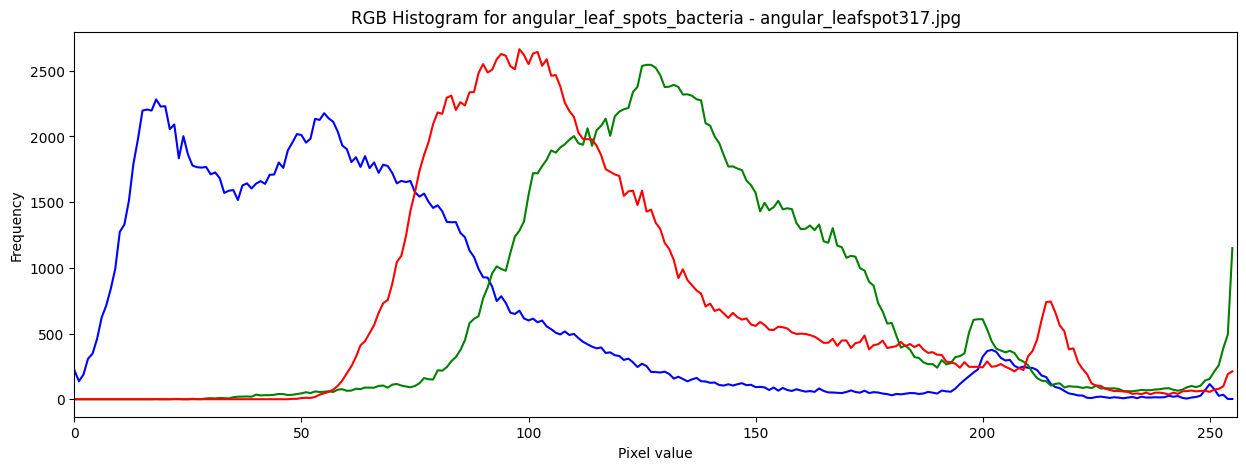

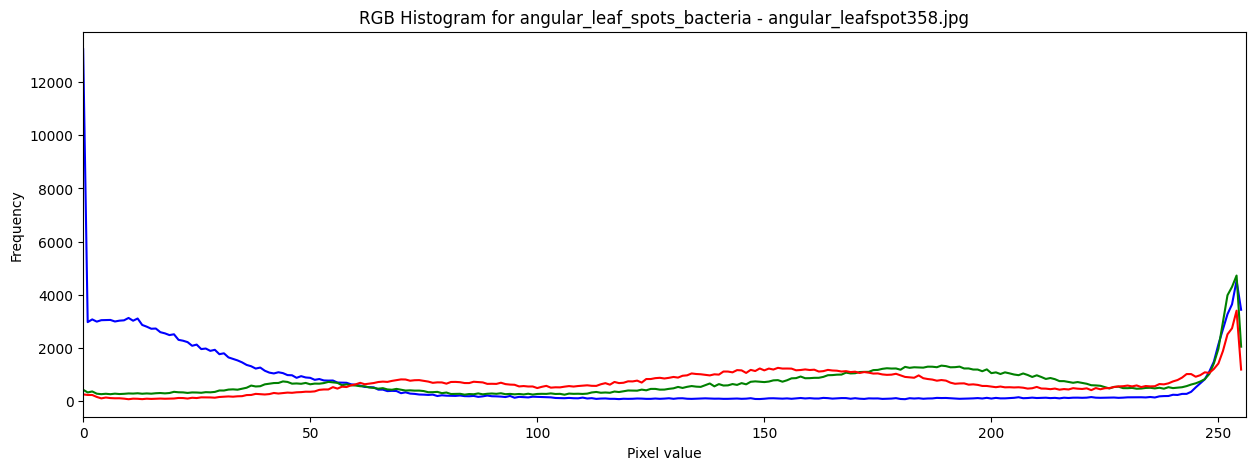

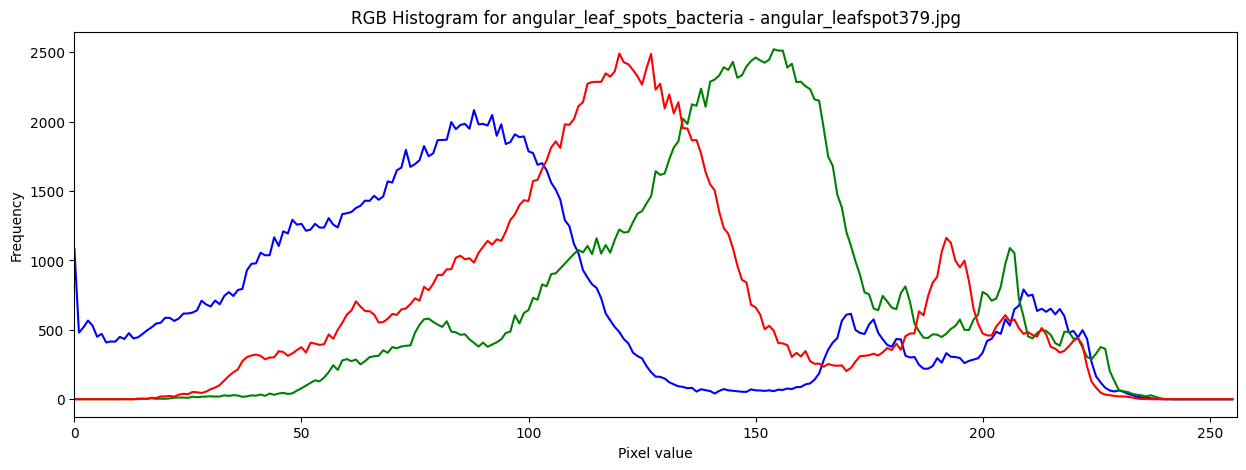

RGB histograms for healthy_leaf:


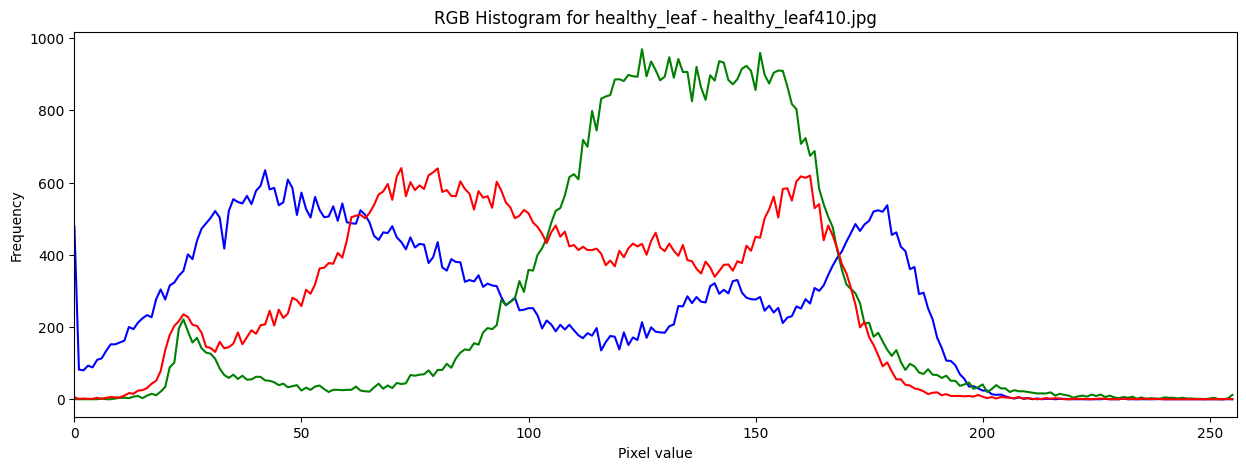

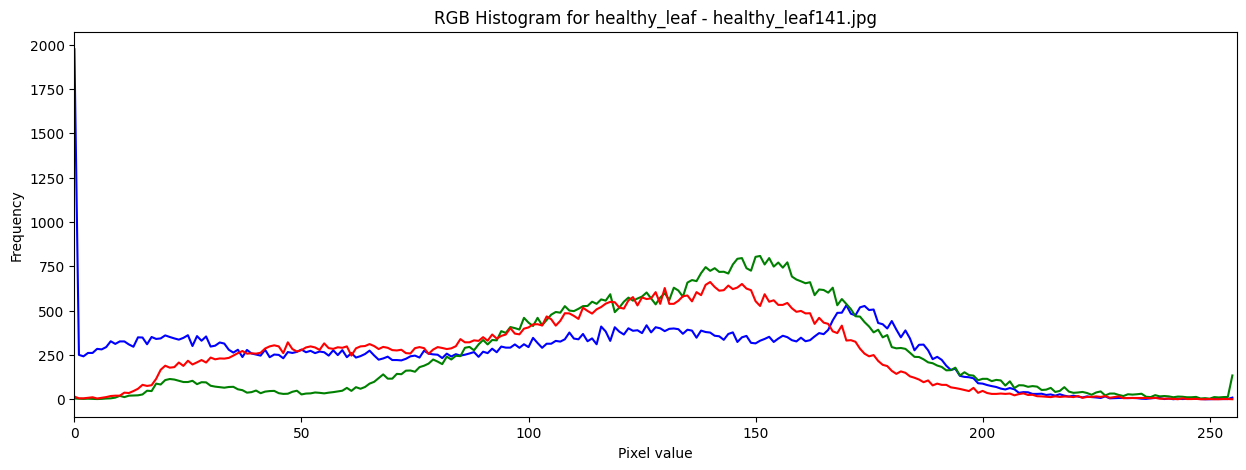

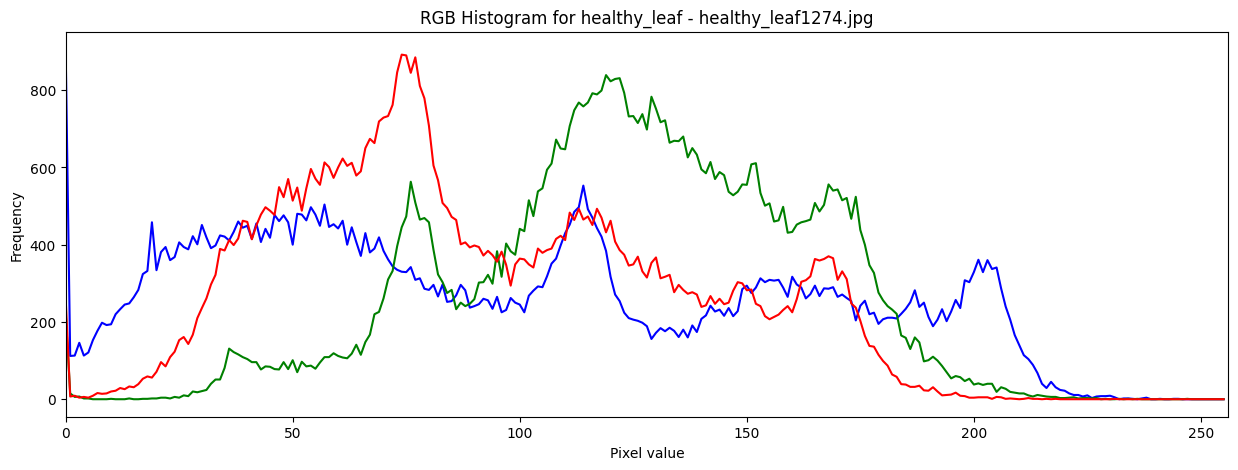

RGB histograms for leaf_scorch_fungus:


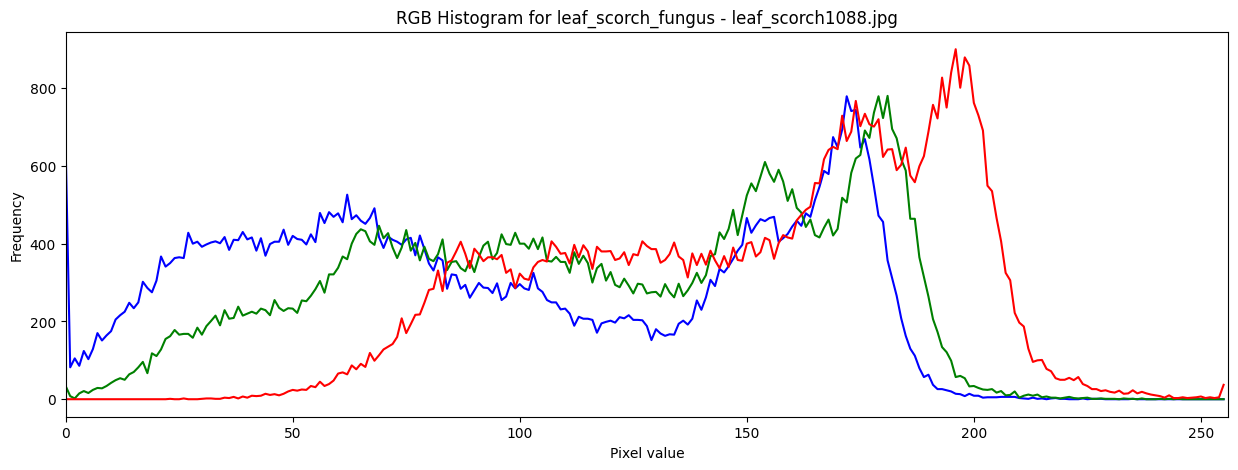

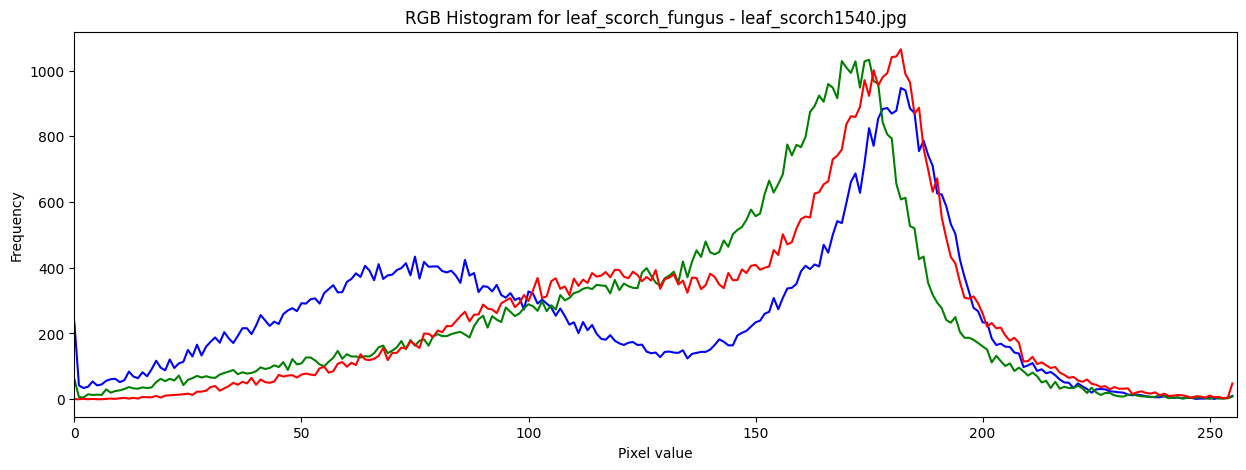

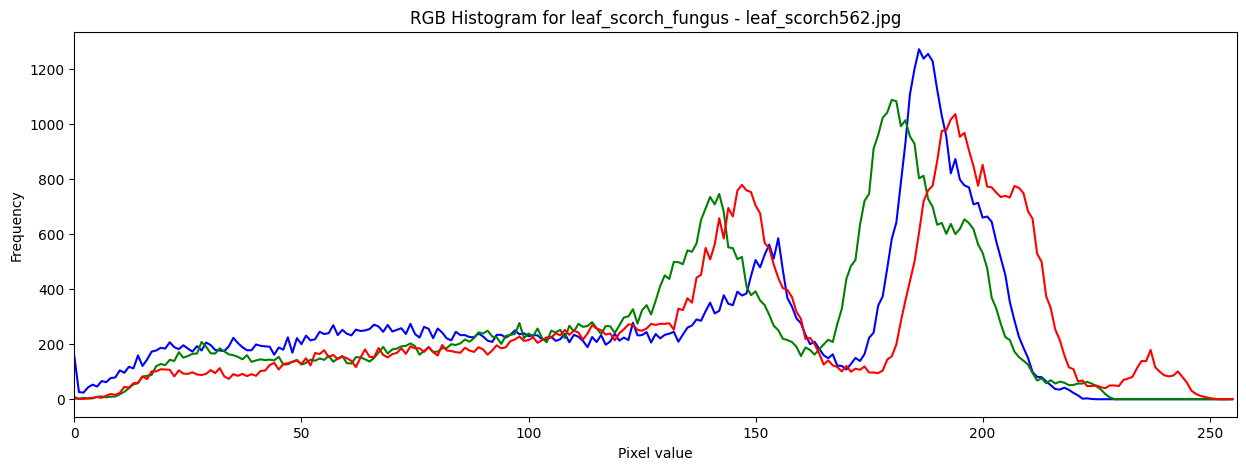

RGB histograms for leaf_spot_fungus:


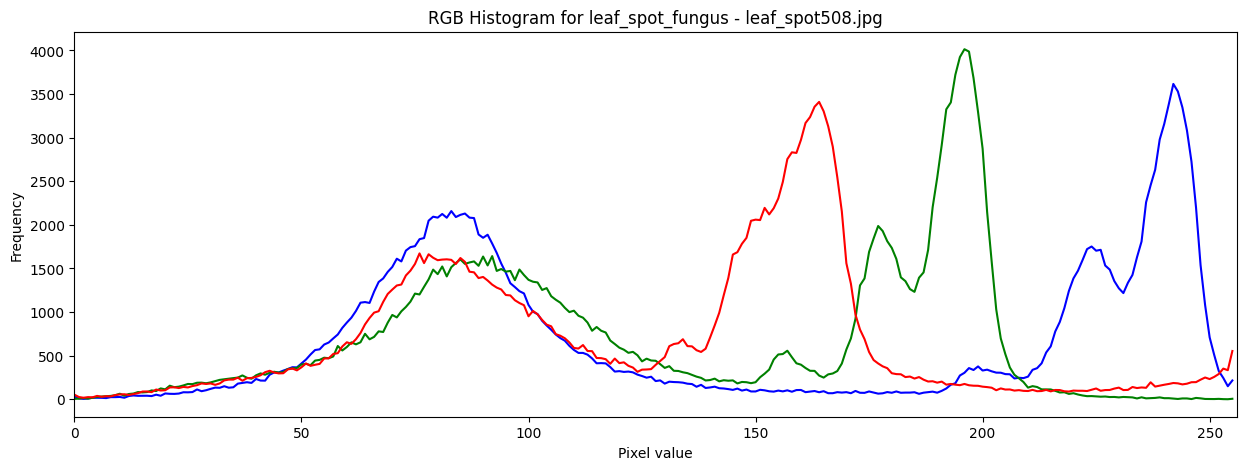

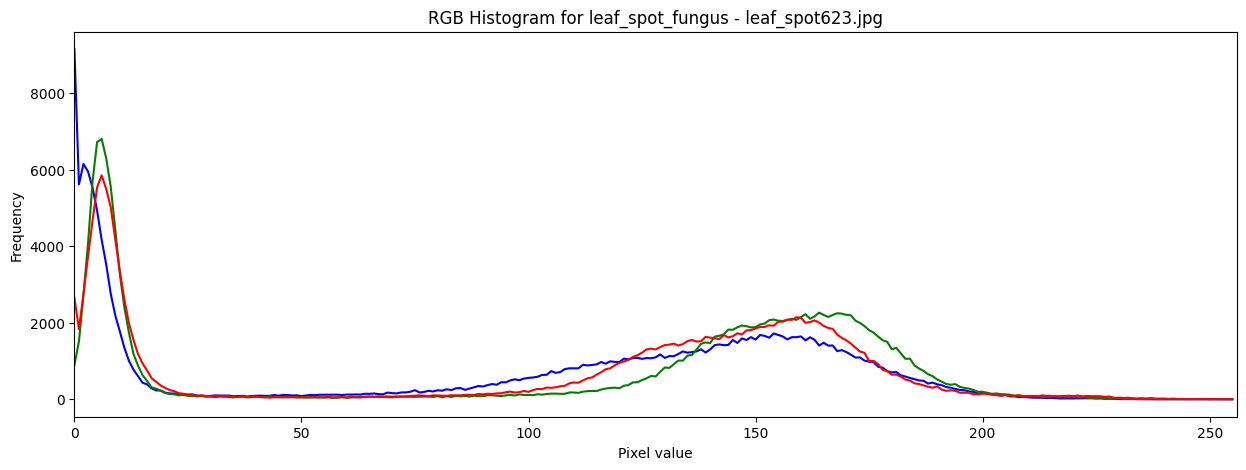

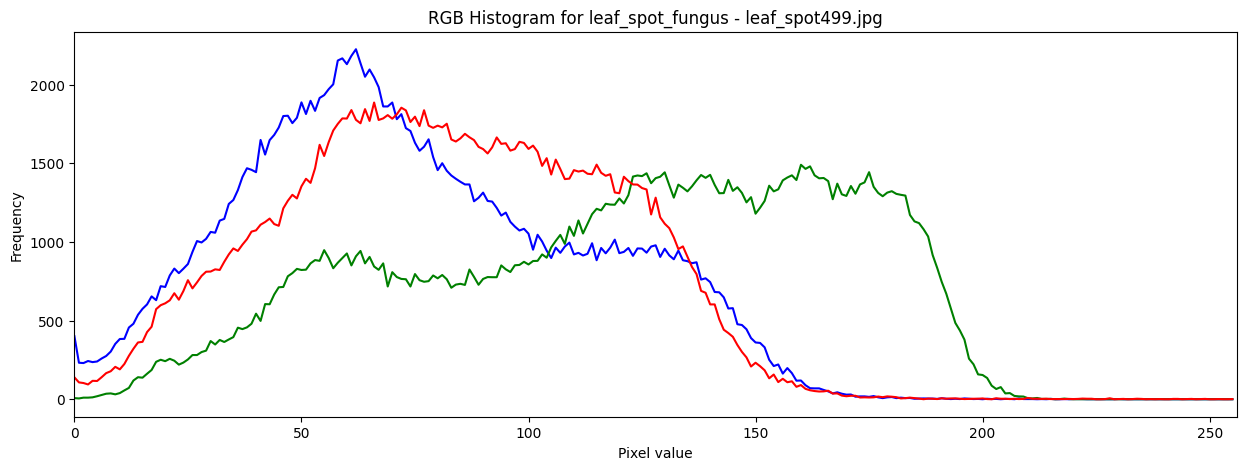

In [9]:
# Function to plot RGB histograms
def plot_rgb_histograms(image_paths, category):
    for img_path in image_paths[:3]:
        img = cv2.imread(img_path)
        color = ('b', 'g', 'r')
        plt.figure(figsize=(15, 5))
        for i, col in enumerate(color):
            histr = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(histr, color=col)
            plt.xlim([0, 256])
        plt.title(f'RGB Histogram for {category} - {os.path.basename(img_path)}')
        plt.xlabel('Pixel value')
        plt.ylabel('Frequency')
        plt.show()

# Plot RGB histograms for each category
for category, paths in sampled_image_paths.items():
    print(f'RGB histograms for {category}:')
    plot_rgb_histograms(paths, category)


#Total energy of images

In [10]:
# Function to calculate total energy of an image
def calculate_total_energy(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    energy = np.sum(np.square(img))
    return energy

# Calculate and display total energy for a few sample images from each category
for category, paths in sampled_image_paths.items():
    print(f'Total energy for {category}:')
    for img_path in paths[:3]:  # Display total energy for a few sample images
        energy = calculate_total_energy(img_path)
        print(f'{os.path.basename(img_path)}: {energy}')


Total energy for angular_leaf_spots_bacteria:
angular_leafspot317.jpg: 18383952
angular_leafspot358.jpg: 17453637
angular_leafspot379.jpg: 17128491
Total energy for healthy_leaf:
healthy_leaf410.jpg: 6665408
healthy_leaf141.jpg: 6833114
healthy_leaf1274.jpg: 6952748
Total energy for leaf_scorch_fungus:
leaf_scorch1088.jpg: 7160733
leaf_scorch1540.jpg: 7205642
leaf_scorch562.jpg: 7020084
Total energy for leaf_spot_fungus:
leaf_spot508.jpg: 19024506
leaf_spot623.jpg: 15485151
leaf_spot499.jpg: 18543718


#Blurriness using Laplacian

In [11]:
# Function to calculate blurriness using Laplacian
def calculate_blurriness(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
    return laplacian_var

# Calculate and display blurriness for a few sample images from each category
for category, paths in sampled_image_paths.items():
    print(f'Blurriness for {category}:')
    for img_path in paths[:3]:  # Display blurriness for a few sample images
        blurriness = calculate_blurriness(img_path)
        print(f'{os.path.basename(img_path)}: {blurriness}')


Blurriness for angular_leaf_spots_bacteria:
angular_leafspot317.jpg: 638.9534532973481
angular_leafspot358.jpg: 2376.8729567569935
angular_leafspot379.jpg: 522.7427217822016
Blurriness for healthy_leaf:
healthy_leaf410.jpg: 4041.1640527248383
healthy_leaf141.jpg: 7820.726294517517
healthy_leaf1274.jpg: 3175.3009979985654
Blurriness for leaf_scorch_fungus:
leaf_scorch1088.jpg: 3734.042814191431
leaf_scorch1540.jpg: 9296.739425241016
leaf_scorch562.jpg: 1166.2692407683935
Blurriness for leaf_spot_fungus:
leaf_spot508.jpg: 1461.3920993886086
leaf_spot623.jpg: 163.91604080047512
leaf_spot499.jpg: 85.16541805873081


In [ ]:
image_paths

In [16]:
# Calculate blurriness scores for each category
blurriness_scores = {}
idx = 0
for category, paths in image_paths.items():
    print(f'Calculating blurriness for {category}:')
    scores = [calculate_blurriness(img_path) for img_path in paths]
    blurriness_scores[category] = scores
    print(blurriness_scores)



Calculating blurriness for angular_leaf_spots_bacteria:
{'angular_leaf_spots_bacteria': [641.2090668052269, 493.3012082503342, 416.11644463673485, 17.687823227035356, 14.17950449685576, 922.8312637777329, 93.86648315445481, 303.37937151782177, 72.75890414816116, 46.22744583640945, 71.49967761236813, 392.7223633200069, 522.7427217822016, 1142.7194983021436, 716.9196783906576, 547.2704979592917, 1079.440330664286, 449.10819780103327, 87.75498519932785, 649.5804536337329, 421.20744336922996, 319.5845051511032, 1706.127702761925, 105.44722124517854, 287.5205757337976, 1060.2306868886012, 363.2858727874292, 451.20129182946994, 440.61994619372325, 1455.5065682013717, 355.2745199253704, 1058.2618628696102, 793.814991688943, 35.957573455559995, 72.01350520569763, 334.3885168117425, 1145.5284915660607, 629.8659129500174, 157.55298136123673, 106.55919293081716, 477.5603947922784, 741.1568784188255, 412.9379759222514, 353.17705044047415, 97.8471923826752, 298.18957946596635, 887.8505923218072, 65

NameError: name 'skew' is not defined

In [18]:
from scipy.stats import skew, kurtosis
for category, scores in blurriness_scores.items():
    skewness = skew(scores)
    kurt = kurtosis(scores)

    print(f"\nCategory: {category}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurt}")

    if abs(skewness) > 1 or kurt > 3:
        print("The data has a heavy tail.")
    else:
        print("The data does not have a heavy tail.")


Category: angular_leaf_spots_bacteria
Skewness: 0.5655800381036677
Kurtosis: 0.7273699216154164
The data does not have a heavy tail.

Category: healthy_leaf
Skewness: 0.19093794050144489
Kurtosis: 0.43663708911860644
The data does not have a heavy tail.

Category: leaf_scorch_fungus
Skewness: 0.10675064939752832
Kurtosis: -0.5708301893219931
The data does not have a heavy tail.

Category: leaf_spot_fungus
Skewness: 3.456186441385753
Kurtosis: 18.604286821239786
The data has a heavy tail.


#Calculating noise using MAD

In [19]:
# Function to calculate noise using MAD
def calculate_mad(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    median = np.median(img)
    mad = np.median(np.abs(img - median))
    return mad

# Calculate and display MAD for a few sample images from each category
for category, paths in sampled_image_paths.items():
    print(f'MAD (Noise) for {category}:')
    for img_path in paths[:3]:  # Display MAD for a few sample images
        mad = calculate_mad(img_path)
        print(f'{os.path.basename(img_path)}: {mad}')


MAD (Noise) for angular_leaf_spots_bacteria:
angular_leafspot317.jpg: 20.0
angular_leafspot358.jpg: 45.0
angular_leafspot379.jpg: 21.0
MAD (Noise) for healthy_leaf:
healthy_leaf410.jpg: 25.0
healthy_leaf141.jpg: 27.0
healthy_leaf1274.jpg: 27.0
MAD (Noise) for leaf_scorch_fungus:
leaf_scorch1088.jpg: 40.0
leaf_scorch1540.jpg: 28.0
leaf_scorch562.jpg: 39.0
MAD (Noise) for leaf_spot_fungus:
leaf_spot508.jpg: 50.0
leaf_spot623.jpg: 33.0
leaf_spot499.jpg: 30.0


#Data Augmentation

In [17]:
# Calculate number of images needed to match max number of images (healthy leaf)
max_count = max(category_counts.values())
augmentation_counts = {category: max_count - count for category, count in category_counts.items()}

print("Number of augmented images needed for each category:")
for category, count in augmentation_counts.items():
    print(f"{category}: {count} images")


Number of augmented images needed for each category:
angular_leaf_spots_bacteria: 1389 images
healthy_leaf: 0 images
leaf_scorch_fungus: 50 images
leaf_spot_fungus: 1209 images


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img

#data augmentation variables
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [36]:
import os

# Create directories to save augmented images
augmented_dir = '/content/drive/MyDrive/omdena/Image Collection/Strawberry Leaf - Beenaa/Augmented'
os.makedirs(augmented_dir, exist_ok=True)

# Function to augment and save images
def augment_images(image_paths, category, num_augmented_images):
    category_dir = os.path.join(augmented_dir, category)
    os.makedirs(category_dir, exist_ok=True)

    augmented_count = 0
    while augmented_count < num_augmented_images:
        for img_path in image_paths:
            if augmented_count >= num_augmented_images:
                break
            img = preprocess_image(img_path)
            img = np.expand_dims(img, axis=0)
            it = datagen.flow(img, batch_size=1)
            for _ in range(num_augmented_images - augmented_count):
                batch = it.next()
                aug_img = array_to_img(batch[0])
                aug_img.save(os.path.join(category_dir, f'aug_{augmented_count}.jpg'))
                augmented_count += 1

# Augment images for each underrepresented category
for category, num_augmented_images in augmentation_counts.items():
    if num_augmented_images > 0:
        print(f"Augmenting {num_augmented_images} images for {category}...")
        augment_images(image_paths[category], category, num_augmented_images)


Augmenting 1389 images for angular_leaf_spots_bacteria...
Augmenting 50 images for leaf_scorch_fungus...
Augmenting 1209 images for leaf_spot_fungus...
